In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:

# Load Titanic dataset
titanic_data = pd.read_csv(r"C:\Users\dhars\Downloads\titanic survival pridiction\train.csv")
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Check for missing values
print(titanic_data.isnull().sum())

# Show basic statistics
titanic_data.describe()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\dhars\AppData\Local\Temp\ipykernel_6380\2236775091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=titanic_data, palette="viridis")


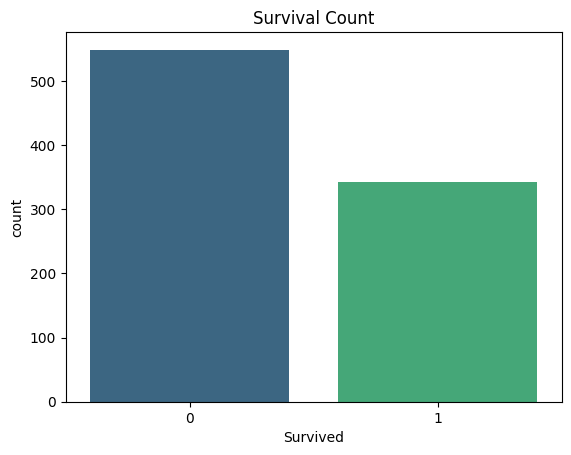

In [8]:
# Plot survival count
sns.countplot(x="Survived", data=titanic_data, palette="viridis")
plt.title("Survival Count")
plt.show()


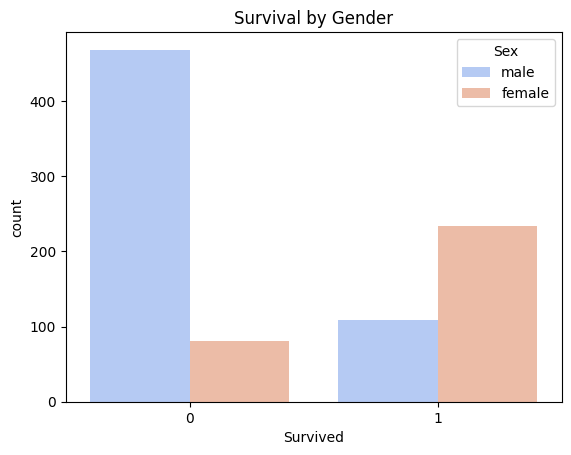

In [9]:
# Plot survival based on gender
sns.countplot(x="Survived", hue="Sex", data=titanic_data, palette="coolwarm")
plt.title("Survival by Gender")
plt.show()


In [10]:
# Fill missing age values with median
titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)

# Fill missing embarked values with most common category
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

# Confirm no missing values remain
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\dhars\AppData\Local\Temp\ipykernel_6380\3865290122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)
C:\Users\dhars\AppData\Local\Temp\ipykernel_6380\3865290122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [11]:
# Convert 'Sex' to numerical
titanic_data["Sex"] = titanic_data["Sex"].map({"male": 1, "female": 0})

# One-hot encode 'Embarked'
titanic_data = pd.get_dummies(titanic_data, columns=["Embarked"], drop_first=True)

# Show modified dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [12]:
# Selecting relevant features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"]
X = titanic_data[features]
y = titanic_data["Survived"]

# Show feature matrix
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,True
1,1,0,38.0,1,0,71.2833,False,False
2,3,0,26.0,0,0,7.9250,False,True
3,1,0,35.0,1,0,53.1000,False,True
4,3,1,35.0,0,0,8.0500,False,True


In [13]:
from sklearn.model_selection import train_test_split

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training data
print(X_train.shape, X_test.shape)


(712, 8) (179, 8)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check training completion
print("Model training completed!")


Model training completed!


In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Show first few predictions
print(y_pred[:10])


[0 0 0 1 0 1 1 0 1 1]


In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.81


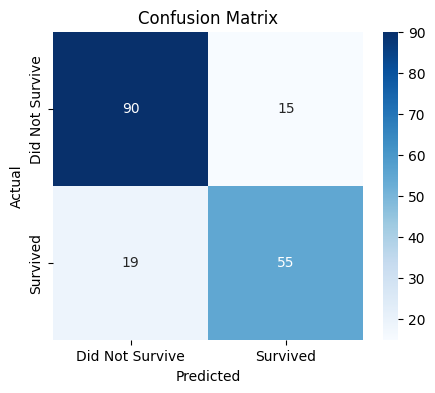

In [17]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\dhars\AppData\Local\Temp\ipykernel_6380\53285124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="magma")


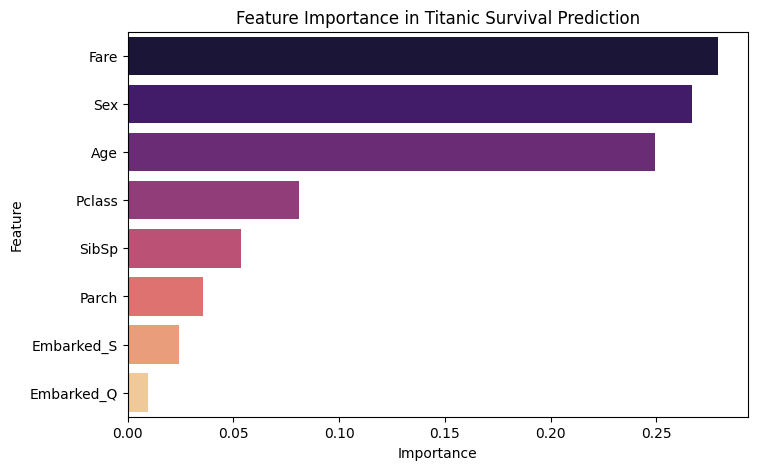

In [19]:
# Get feature importances
importances = model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="magma")
plt.title("Feature Importance in Titanic Survival Prediction")
plt.show()


In [20]:
# Predict survival for all passengers
titanic_data["Predicted_Survival"] = model.predict(X)

# Show first few predictions
titanic_data[["PassengerId", "Survived", "Predicted_Survival"]].head()


,PassengerId,Survived,Predicted_Survival
0,1,0,0
1,2,1,1
2,3,1,1
3,4,1,1
4,5,0,0
